In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [3]:
train = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Data Understanding


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.shape

(614, 13)

In [7]:
test_data.shape

(367, 12)

In [8]:
train.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
546,LP002768,Male,No,0,Not Graduate,No,3358,0.0,80.0,36.0,1.0,Semiurban,N
486,LP002545,Male,No,2,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural,N
257,LP001854,Male,Yes,3+,Graduate,No,5250,0.0,94.0,360.0,1.0,Urban,N
388,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban,Y
56,LP001195,Male,Yes,0,Graduate,No,2132,1591.0,96.0,360.0,1.0,Semiurban,Y


In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
train.isnull().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [13]:
test_data.isnull().mean()*100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [14]:
train.duplicated().sum()

0

In [15]:
test_data.duplicated().sum()

0

# Data Cleaning

In [16]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
train = train.drop(columns=["Loan_ID"])
test = test_data.drop(columns=["Loan_ID"])

In [18]:
train["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [19]:
train["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
train["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [21]:
test["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [22]:
train["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [23]:
train["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [24]:
train["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [25]:
train["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [26]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [27]:
train["Loan_Status"].nunique()

2

Null Value Imputation 1

In [28]:
train["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [29]:
train["Gender"] = train["Gender"].fillna(train["Gender"].mode()[0])

In [30]:
train["Married"].mode()

0    Yes
Name: Married, dtype: object

In [31]:
train["Married"] = train["Married"].fillna(train["Married"].mode()[0])

In [32]:
train["Dependents"] = train["Dependents"].str.replace("+","")

C:\Users\mohit\AppData\Local\Temp\ipykernel_16028\3768660293.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train["Dependents"] = train["Dependents"].str.replace("+","")


In [33]:
train["Dependents"].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [34]:
train["Dependents"].mode()

0    0
Name: Dependents, dtype: object

In [35]:
train["Dependents"] = train["Dependents"].fillna(train["Dependents"].mode()[0])

In [36]:
train["Self_Employed"].mode()

0    No
Name: Self_Employed, dtype: object

In [37]:
train["Self_Employed"] = train["Self_Employed"].fillna(train["Self_Employed"].mode()[0])

In [38]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [39]:
train["LoanAmount"] = train["LoanAmount"].fillna(train["LoanAmount"].mean())

In [40]:
train["Loan_Amount_Term"] = train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mean())

In [41]:
train["Credit_History"] = train["Credit_History"].fillna(train["Credit_History"].mean())

In [42]:
train.isnull().mean()*100

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [43]:
test["Gender"] = test["Gender"].fillna(test["Gender"].mode()[0])
test["Married"] = test["Married"].fillna(test["Married"].mode()[0])
test["Dependents"] = test["Dependents"].str.replace("+","")
test["Dependents"] = test["Dependents"].fillna(test["Dependents"].mode()[0])
test["Self_Employed"] = test["Self_Employed"].fillna(test["Self_Employed"].mode()[0])
test["LoanAmount"] = test["LoanAmount"].fillna(test["LoanAmount"].mean())
test["Loan_Amount_Term"] = test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mean())
test["Credit_History"] = test["Credit_History"].fillna(test["Credit_History"].mean())

C:\Users\mohit\AppData\Local\Temp\ipykernel_16028\3493761333.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test["Dependents"] = test["Dependents"].str.replace("+","")


In [44]:
test.isnull().mean()*100

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64

# Exploratory Data Analysis

In [45]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [46]:
print(train["CoapplicantIncome"].dtypes)

float64


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Univariant Analysis

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


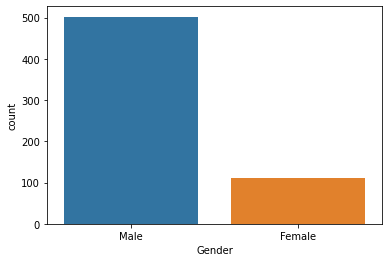

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


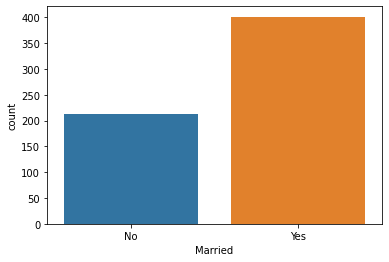

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


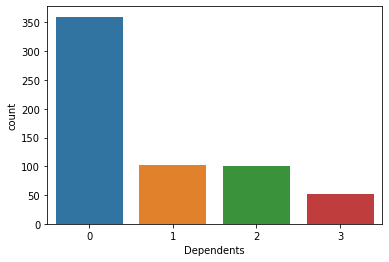

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


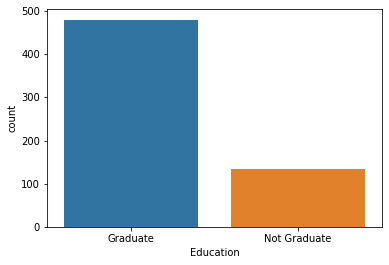

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


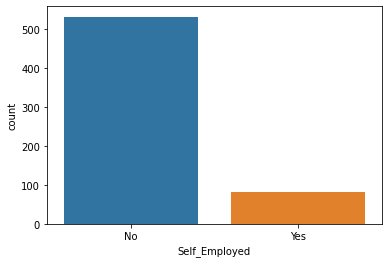

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


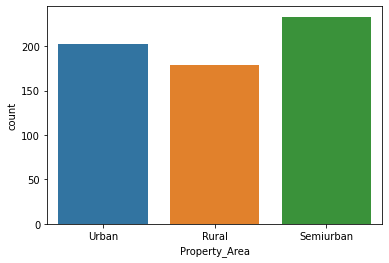

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


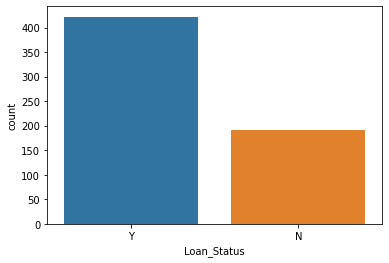

In [48]:
# Bar Plot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "object":
        plt.show(sns.countplot(train[train.columns[i]]))

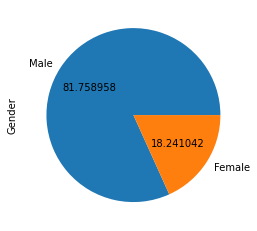

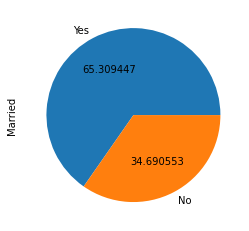

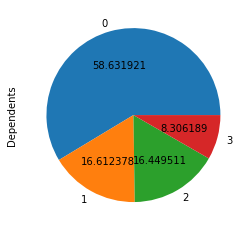

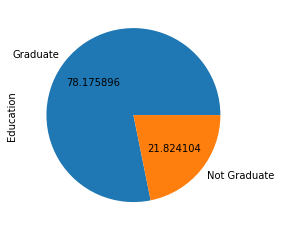

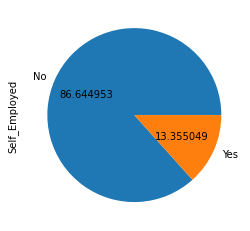

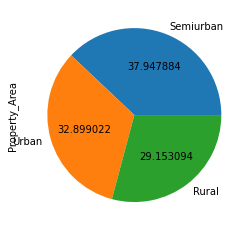

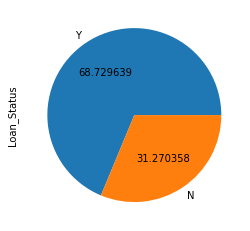

In [49]:
# Pie Chart
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "object":
        plt.show(train[train.columns[i]].value_counts().plot(kind="pie", autopct="%2f"))

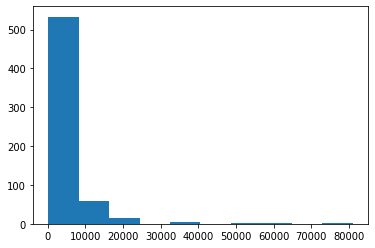

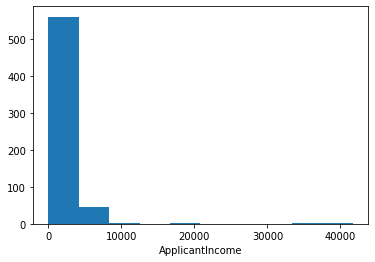

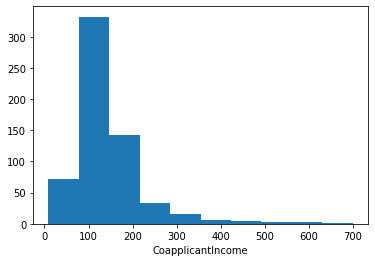

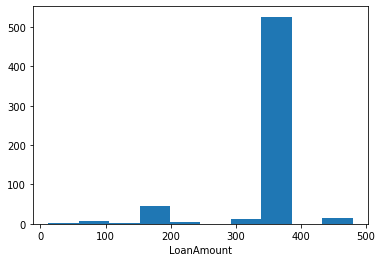

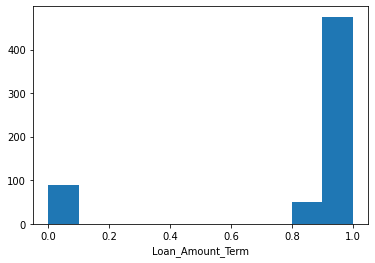

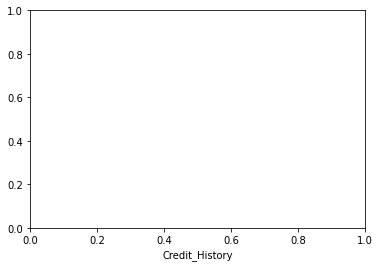

In [50]:
# Histogram
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(plt.hist(train[train.columns[i]]))
        plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


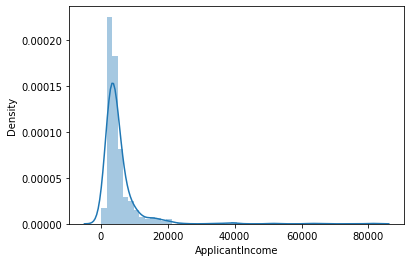

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


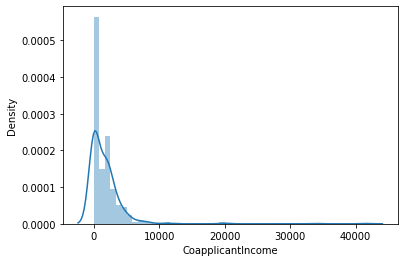

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


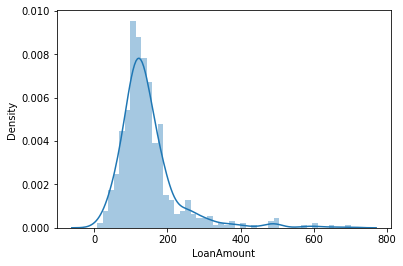

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


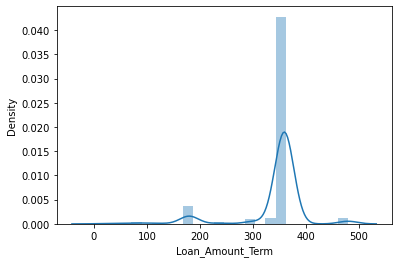

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


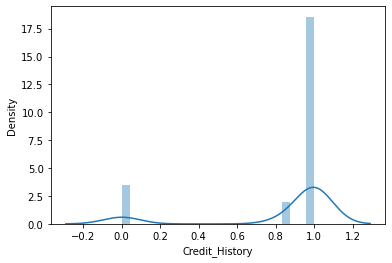

In [51]:
# Distplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


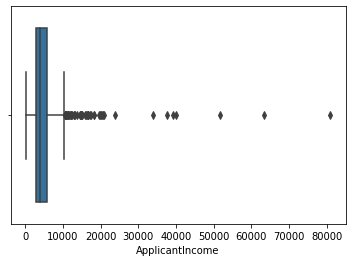

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


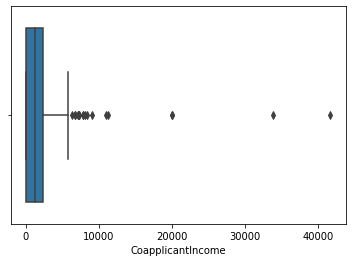

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


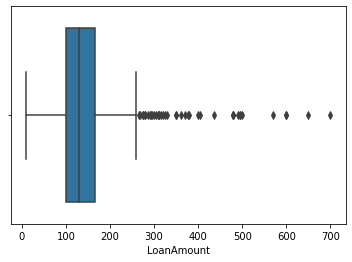

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


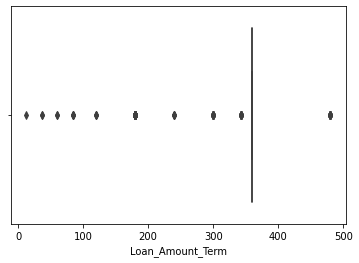

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


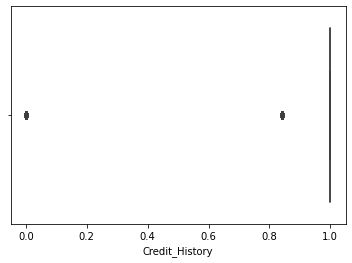

In [52]:
# Boxplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

Bivariant Analysis

In [53]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Numeriacl - Numerical

1. ScatterPlot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

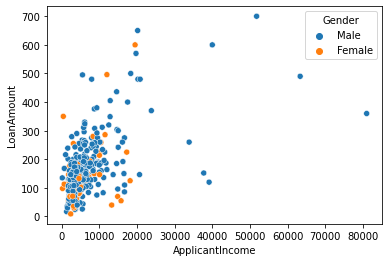

In [54]:
sns.scatterplot(train["ApplicantIncome"], train["LoanAmount"], hue=train["Gender"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

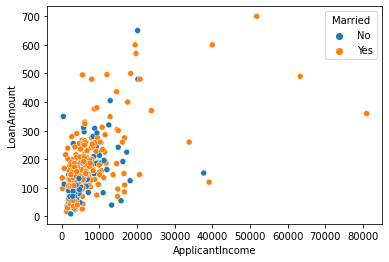

In [55]:
sns.scatterplot(train["ApplicantIncome"], train["LoanAmount"], hue=train["Married"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

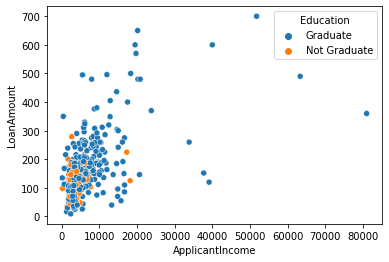

In [56]:
sns.scatterplot(train["ApplicantIncome"], train["LoanAmount"], hue=train["Education"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

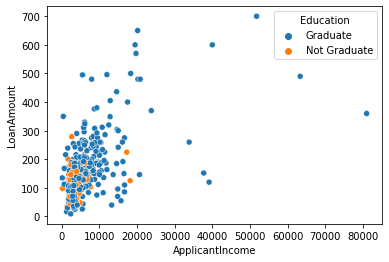

In [57]:
sns.scatterplot(train["ApplicantIncome"], train["LoanAmount"], hue=train["Education"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

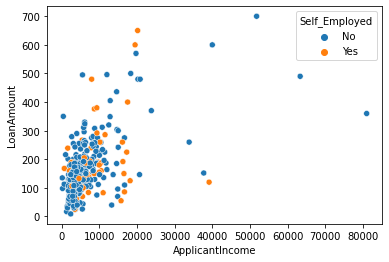

In [58]:
sns.scatterplot(train["ApplicantIncome"], train["LoanAmount"], hue=train["Self_Employed"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

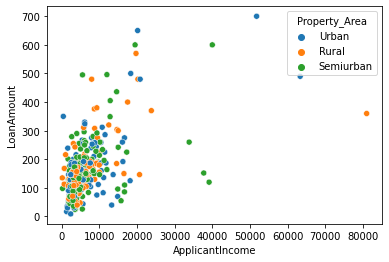

In [59]:
sns.scatterplot(train["ApplicantIncome"], train["LoanAmount"], hue=train["Property_Area"])

2. Line PLot

In [60]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [61]:
train["Loan_Amount_Term"].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

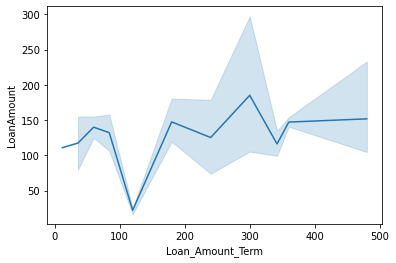

In [62]:
# Used mostly when x-axis have time series data
sns.lineplot(train["Loan_Amount_Term"], train["LoanAmount"])

Numericaal - Categorical 

In [63]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


1. Bar PLot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

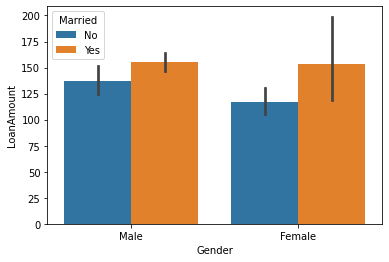

In [64]:
sns.barplot(train["Gender"], train["LoanAmount"], hue=train["Married"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

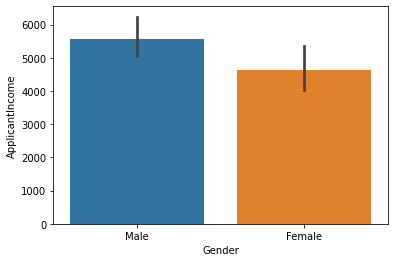

In [65]:
sns.barplot(train["Gender"], train["ApplicantIncome"])#, hue=train["Married"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

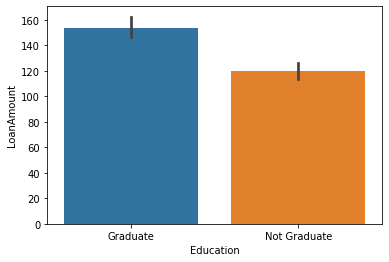

In [66]:
sns.barplot(train["Education"], train["LoanAmount"])#, hue=train["Married"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

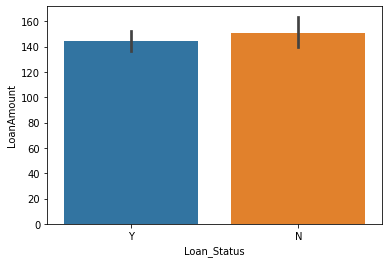

In [67]:
sns.barplot(train["Loan_Status"], train["LoanAmount"])#, hue=train["LoanAmount"])

In [68]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


2. Box Plot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

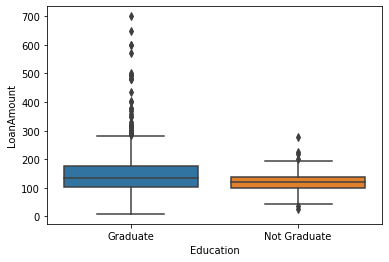

In [69]:
sns.boxplot(train["Education"], train["LoanAmount"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

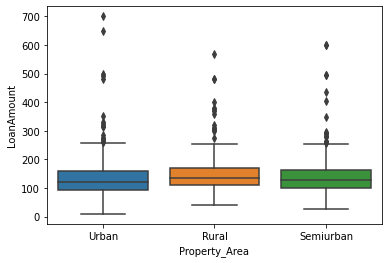

In [70]:
sns.boxplot(train["Property_Area"], train["LoanAmount"])

In [71]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


3. Dist Plot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

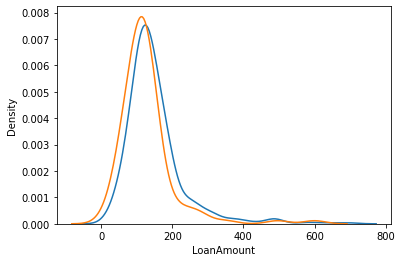

In [72]:
# Probability of Male getting Loan Amount
sns.distplot(train[train["Gender"]=="Male"]["LoanAmount"], hist = False)
# Probability of Female getting Loan Amount
sns.distplot(train[train["Gender"]=="Female"]["LoanAmount"], hist = False) 

Categorical - Categorical

In [73]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


1. HeatMap

<AxesSubplot:xlabel='Loan_Status', ylabel='Gender'>

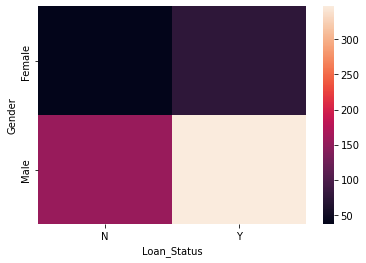

In [74]:
sns.heatmap(pd.crosstab(train["Gender"], train["Loan_Status"]))

<AxesSubplot:xlabel='Loan_Status', ylabel='Education'>

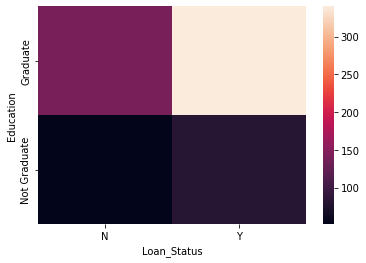

In [75]:
sns.heatmap(pd.crosstab(train["Education"], train["Loan_Status"]))

<AxesSubplot:xlabel='Loan_Status', ylabel='Property_Area'>

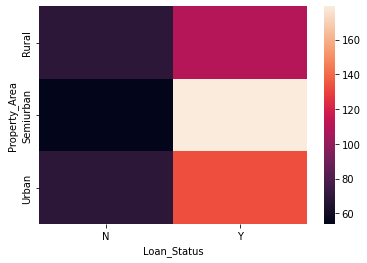

In [76]:
sns.heatmap(pd.crosstab(train["Property_Area"], train["Loan_Status"]))

In [77]:
#train.pivot_table(values="Depentents",index="ApplicantIncome", columns="LoanAmount")

2. ClusterMap

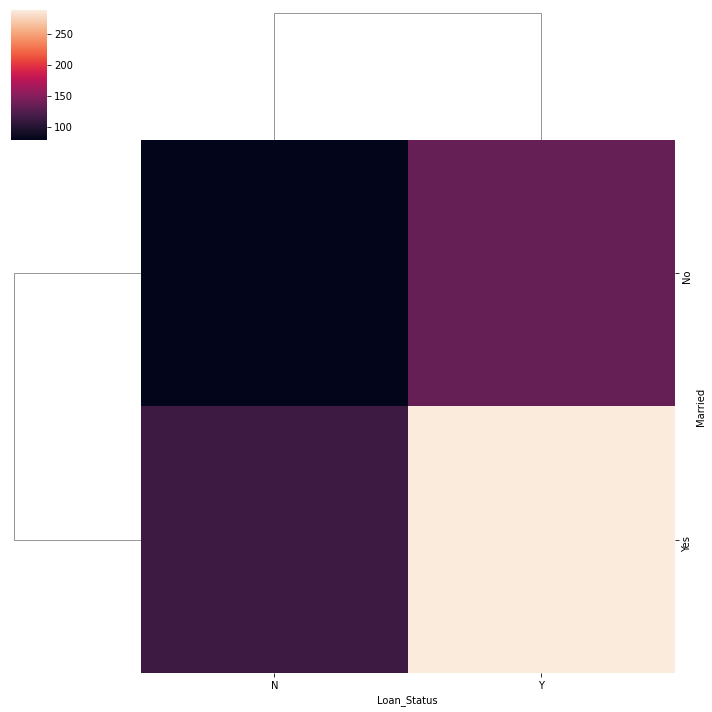

In [78]:
sns.clustermap(pd.crosstab(train["Married"], train["Loan_Status"]))

Multivariant Analysis

In [79]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


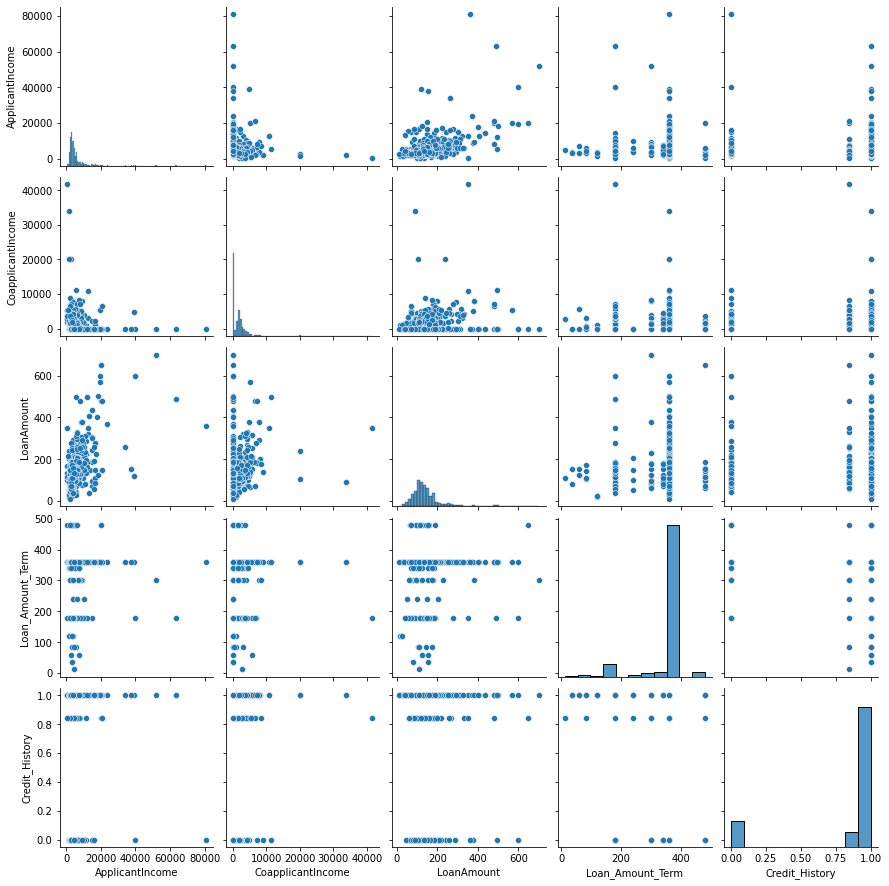

In [80]:
#sns.pairplot(train, hue ="species")
sns.pairplot(train)

In [81]:
train.shape

(614, 12)

In [82]:
test.shape

(367, 11)

# Feature Transformation

1. Outlier Detection

In [83]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


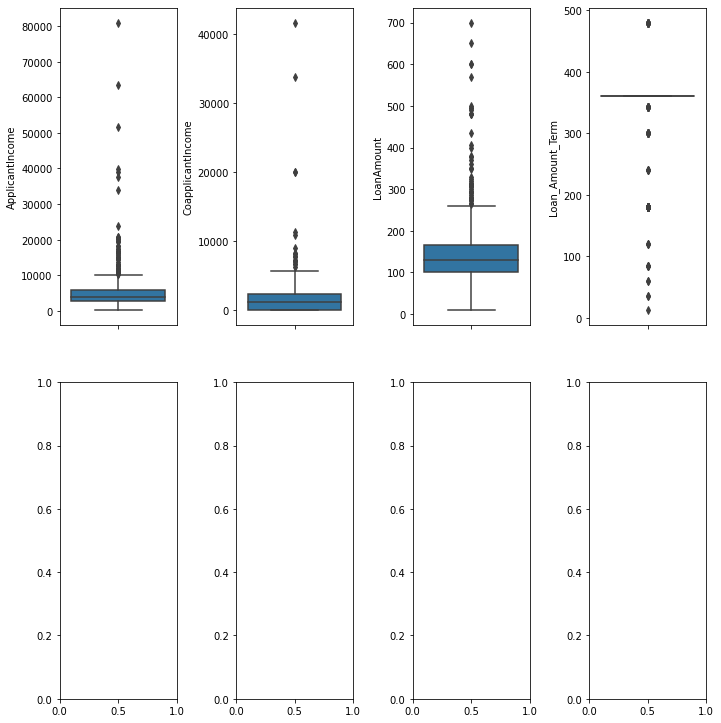

In [84]:
data1 = train.drop(columns=["Loan_Status","Gender","Married","Education","Self_Employed","Property_Area","Credit_History","Dependents"], axis=1)
#data1.head()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(10, 10))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

2. Handling Categorical Features 

3. Feature Scaling - Normalization

In [85]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [86]:
x = train.iloc[:,:-1]
y = train.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [87]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
222,Male,No,0,Graduate,No,2971,2791.0,144.0,360.0,1.0,Semiurban
281,Male,Yes,0,Graduate,No,3927,800.0,112.0,360.0,1.0,Semiurban
372,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural
32,Male,No,1,Graduate,Yes,4692,0.0,106.0,360.0,1.0,Rural
204,Male,Yes,2,Not Graduate,No,3917,0.0,124.0,360.0,1.0,Semiurban


In [88]:
y_train.head()

222    Y
281    Y
372    Y
32     N
204    Y
Name: Loan_Status, dtype: object

In [89]:
transformer = ColumnTransformer(transformers=[
    ("tnf1", OneHotEncoder(drop="first", sparse=False), ["Gender", "Married", "Education", "Self_Employed","Property_Area"]),
    ("tnf2", StandardScaler(), ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"])
], remainder="passthrough")

In [90]:
x_train = transformer.fit_transform(x_train)

In [91]:
x_test = transformer.transform(x_test)

In [92]:
test_transformed = transformer.transform(test)

In [93]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [94]:
# Sampling the Data
smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

In [95]:
y_train.shape

(491,)

In [96]:
y_train_sm.shape

(676,)

In [97]:
x_train_sm.shape

(676, 12)

In [98]:
x_train.shape

(491, 12)

# Model Building

**Logistic Regression**

In [106]:
logr = LogisticRegression()
model = logr.fit(x_train_sm,y_train_sm)
pred = model.predict(x_test)
accuracy_score(y_test, pred)*100

73.17073170731707

In [320]:
score = []
for i in range(5000):
    x = train.iloc[:,:-1]
    y = train.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)
    
    smote = SMOTE(sampling_strategy="minority")
    x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)
    
    logr = LogisticRegression()
    logr.fit(x_train_sm,y_train_sm)
    pred = logr.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  2311
88.6178861788618


In [321]:
logr = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2311)
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

model1 = logr.fit(x_train_sm,y_train_sm)
pred = model1.predict(x_test)
accuracy_score(y_test, pred)*100

88.6178861788618

**Random Forest Classifier**

In [322]:
rf = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=4)
rf.fit(x_train_sm,y_train_sm)
pred = rf.predict(x_test)
accuracy_score(y_test, pred)*100

86.99186991869918

In [323]:
score = []
for i in range(500):
    x = train.iloc[:,:-1]
    y = train.iloc[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)
    
    smote = SMOTE(sampling_strategy="minority")
    x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)
    
    rfc = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=4, n_jobs=-1)
    rfc.fit(x_train_sm,y_train_sm)
    pred = rfc.predict(x_test)
    score.append(accuracy_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  8
89.43089430894308


In [324]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=3, min_samples_split=4, n_jobs=-1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=8)
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

model2 = rfc.fit(x_train_sm,y_train_sm)
pred = model2.predict(x_test)
accuracy_score(y_test, pred)*100

86.1788617886179

In [330]:
test_pred = model1.predict(test_transformed)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [326]:
predictions = []
for i in test_pred:
    if i == 0:
        predictions.append("N")
    else:
        predictions.append("Y")

In [327]:
list(predictions)

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N'

In [328]:
submission = pd.DataFrame({"Loan_ID": test_data["Loan_ID"],"Loan_Status": predictions})

In [331]:
submission.to_csv('Loan_Prediction_submission.csv', index=False)